In [1]:
# import libraries
import pandas as pd
import autograd.numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

# Read in Train and Test Data

In [2]:
# read in train data
df_train = pd.read_csv("Train.csv", sep=",")
df_train

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style,category
0,1,False,"11 12, 2016",C413C78E10E54C5DB41837889F36C1E8,565D194F38B1CC3F806EE677C61F639C,465E154EC79AFFAB5EB2607198B21433,all of the reviews for this product are fake.,"All fake reviews, beware.",1478908800,2.0,NaN,{'Size:': ' Polaris H4'},automotive
1,1,True,"12 6, 2016",490AE37808EFEE3AF4FE6DEBDEB5A4C8,0D66512A0A7F580523AB996378DF0F14,760C63E8E5E8DC3FAA01878D37BA5678,wrong part. our fault.,One Star,1480982400,NaN,NaN,NaN,automotive
2,1,True,"09 17, 2014",74A9FA5A64449BEE2A2E8E3F62872F0F,A0E45600FF2C5A779CB4314F379C253A,C6E4DD5C1C4EC09E90182644ED6CA9EF,this wire set it really sucks!!!,One Star,1410912000,NaN,NaN,NaN,automotive
3,1,True,"06 11, 2016",EB561158A2829D98B467FE03CC1E45F1,37AB9A82470595E0ACB88BAC48C150EE,F4892A77EA45C52F40AB17ED537EF9FF,"first use, it leaked instantly. even at 5 buck...",One Star,1465603200,NaN,NaN,"{'Color:': ' Clear', 'Style:': ' 45 Degree'}",automotive
4,1,True,"12 23, 2017",5045D801332850D21618DD13A697CD9B,5772FF30428EEB8E0258C1A53CA2EC50,522F0BBFF2B47F1D63FF781A0AB1D079,didn't fit,One Star,1513987200,NaN,NaN,NaN,automotive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29184,5,True,"03 20, 2015",24A0B29940152C574DA401347CE47E7A,CD83ED06223FE876323282B57209D765,1B5F1A160CB115EB26D0651E5BF59BE9,this is the same plush toy that the official d...,"Well constructed, very soft",1426809600,NaN,NaN,NaN,toys
29185,5,True,"05 15, 2014",AD3FD1D6499FA73ACBCBB39F89EE5BF9,3625ADD67F860057FD15B71FD0389264,C8DC85A8F6B8527735AF7FA6182BB209,"my grandson loved this. it is a great toy, he ...",Fun toy,1400112000,NaN,NaN,NaN,toys
29186,5,True,"11 13, 2017",24C8C33C6FD8ACCAFE2EC1D1FC4DBF05,0C0DF58B2AC0350731C4146D32DBD3F0,951CEFD3CA5CB6773251E773379FF26A,my kiddo loves them! we are a rock climbing fa...,and now the play set has a nice climbing feature,1510531200,NaN,NaN,NaN,toys
29187,5,True,"01 2, 2018",E313EE1C17E5E553343F50BBC95BB2C2,9C9D7AAF41631F1096FE10FBA18B6029,F5A4D2A1C2A0CAD7BBC378CB10CB410C,i bought this for my niece (age 2) and mailed ...,my brother said she liked it and I haven't see...,1514851200,NaN,NaN,{'Style:': ' Standard Version'},toys


In [3]:
# read in test data
df_test = pd.read_csv("Test.csv", sep=",")
df_test

,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style,category
0,True,"07 23, 2015",28EA11D68FB7FF05B5ABB5989B0EDDD2,2CC19105CB9E7E4C30B1A399F3BFA181,B468F2974AA56619CF81B9DB66277892,ordered 318c and receive the 303c. my bad. i d...,Wrong filter,1437609600,NaN,NaN,NaN,automotive
1,True,"11 14, 2016",465EF4B95F3C23F3D2E0DF032806B593,44FF14695671384604654465F32F51BE,B9CBF62E157F0A8798A4D33BA089CE2B,slime must have a serious manufacturing defect...,Don't waste your time on the compressor lottery.,1479081600,6.0,NaN,NaN,automotive
2,True,"12 8, 2016",139CE33FEE21437434272524E638F60B,FD46962FBDA48B8BCB6BCCDE86515E83,68A0EDEBA61ACC7DD4096275BBFA6C8A,while the description says will not produce an...,Not error free in 2012 Mini Countryman S ALL4,1481155200,NaN,NaN,NaN,automotive
3,True,"06 16, 2016",5FAB0AEBEEF467F40843E12D1AD2176C,B602B679B1EDBD9C59BC91802E521324,5C6E597BBBCACE38B3335C3D02CB0522,"this keys could not start my truck, after cutt...","This keys could not start my truck, after cutt...",1466035200,NaN,NaN,{'Color:': ' Black'},automotive
4,False,"12 3, 2016",EEEFD48788F090F22767829BD219B24C,DA059E333E0AF68256582317DBEDA711,50DDC9EE6BA5B5E97F77CDC57CC32EFD,kept on trickle charger when the hd was not ri...,Kept on trickle charger when the HD was not ri...,1480723200,NaN,NaN,NaN,automotive
...,...,...,...,...,...,...,...,...,...,...,...,...
4495,True,"05 21, 2016",96229E77FBE5E282B1C28D480C4A7E9D,3D9B6884A0E19B6E98C4397E8AEC6969,471965BDE985724707CC087CE0E713FC,the name schleich speaks for itself.,Five Stars,1463788800,NaN,NaN,{'Product Packaging:': ' Standard Packaging'},toys
4496,True,"12 22, 2014",010ED927C28962D8BCEF691AC3C2CF61,E5B78BCDC7C77E82F9200E8E876EF31F,557BB4EFC53486EFFC9C113FE2B1A9E7,was what i expected,Five Stars,1419206400,NaN,NaN,NaN,toys
4497,True,"12 17, 2011",CB6E508974747F4052E87E8FAC4851AD,9DE6FD79FECA9146D5350C831A95AE07,4DEDB16F4FFA333ADEAA4CD80A46B4BD,my son loves it. every time it's in the playr...,Great,1324080000,NaN,NaN,{'Color:': ' Regular'},toys
4498,True,"05 23, 2018",6554C955821D198A9A120131E0ABC9A4,90430F87881E42941D83893F647945A2,BCCA8B84B04D85C637DF6503D9227641,very cute. fits in car seat handle but is defi...,Five Stars,1527033600,NaN,NaN,NaN,toys


# Processing Data

To manage the <i><b>reviewText</b></i> column, we will vectorize these reviews using uni-, bi-, and trigrams, with min_df set to 5 and blocking stop words.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word', ngram_range=(1,3), min_df=5, stop_words='english')

uni_bi_tri = cv.fit(df_train['reviewText'])

In [5]:
df_train

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style,category
0,1,False,"11 12, 2016",C413C78E10E54C5DB41837889F36C1E8,565D194F38B1CC3F806EE677C61F639C,465E154EC79AFFAB5EB2607198B21433,all of the reviews for this product are fake.,"All fake reviews, beware.",1478908800,2.0,NaN,{'Size:': ' Polaris H4'},automotive
1,1,True,"12 6, 2016",490AE37808EFEE3AF4FE6DEBDEB5A4C8,0D66512A0A7F580523AB996378DF0F14,760C63E8E5E8DC3FAA01878D37BA5678,wrong part. our fault.,One Star,1480982400,NaN,NaN,NaN,automotive
2,1,True,"09 17, 2014",74A9FA5A64449BEE2A2E8E3F62872F0F,A0E45600FF2C5A779CB4314F379C253A,C6E4DD5C1C4EC09E90182644ED6CA9EF,this wire set it really sucks!!!,One Star,1410912000,NaN,NaN,NaN,automotive
3,1,True,"06 11, 2016",EB561158A2829D98B467FE03CC1E45F1,37AB9A82470595E0ACB88BAC48C150EE,F4892A77EA45C52F40AB17ED537EF9FF,"first use, it leaked instantly. even at 5 buck...",One Star,1465603200,NaN,NaN,"{'Color:': ' Clear', 'Style:': ' 45 Degree'}",automotive
4,1,True,"12 23, 2017",5045D801332850D21618DD13A697CD9B,5772FF30428EEB8E0258C1A53CA2EC50,522F0BBFF2B47F1D63FF781A0AB1D079,didn't fit,One Star,1513987200,NaN,NaN,NaN,automotive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29184,5,True,"03 20, 2015",24A0B29940152C574DA401347CE47E7A,CD83ED06223FE876323282B57209D765,1B5F1A160CB115EB26D0651E5BF59BE9,this is the same plush toy that the official d...,"Well constructed, very soft",1426809600,NaN,NaN,NaN,toys
29185,5,True,"05 15, 2014",AD3FD1D6499FA73ACBCBB39F89EE5BF9,3625ADD67F860057FD15B71FD0389264,C8DC85A8F6B8527735AF7FA6182BB209,"my grandson loved this. it is a great toy, he ...",Fun toy,1400112000,NaN,NaN,NaN,toys
29186,5,True,"11 13, 2017",24C8C33C6FD8ACCAFE2EC1D1FC4DBF05,0C0DF58B2AC0350731C4146D32DBD3F0,951CEFD3CA5CB6773251E773379FF26A,my kiddo loves them! we are a rock climbing fa...,and now the play set has a nice climbing feature,1510531200,NaN,NaN,NaN,toys
29187,5,True,"01 2, 2018",E313EE1C17E5E553343F50BBC95BB2C2,9C9D7AAF41631F1096FE10FBA18B6029,F5A4D2A1C2A0CAD7BBC378CB10CB410C,i bought this for my niece (age 2) and mailed ...,my brother said she liked it and I haven't see...,1514851200,NaN,NaN,{'Style:': ' Standard Version'},toys


# Separating Data

In [6]:
from sklearn.model_selection import train_test_split

# y is just the 'overall' labels
Y = np.array([df_train['overall']]).T

# x is the vectorized reviews
X_vect_train = uni_bi_tri.transform(df_train['reviewText'])

# create the x for the test set; we don't have y yet
X_vect_test = uni_bi_tri.transform(df_test['reviewText'])

# split train data into a train set and test set for scoring
X_train, X_test, y_train, y_test = train_test_split(X_vect_train, Y, train_size=.8, random_state=42)

In [123]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans

# hyperparameter tuning/model generation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# scoring
from sklearn.preprocessing import label_binarize
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import rand_score

# Binary Classification

For each cutoff, we will use <b>Logistic Regression</b>, <b>Perceptron</b>, and <b>KNN</b> classifiers.

We will use $\text{GridSearchCV}$ to tune hyperparameters through 5-fold cross validation for each model.

In [8]:
its = 5000  # maximum number of iterations for convergence

### Logistic Regression Pipeline and Hyperparameters

In [9]:
lr_pipe = Pipeline([('clf', LogisticRegression(max_iter=its))])

lr_grid_params = {
    'clf__C': [.01, .1, 1, 5],
    'clf__solver': ['newton-cg', 'liblinear']
}

### Perceptron Pipeline and Hyperparameters

In [10]:
per_pipe = Pipeline([('clf', Perceptron(max_iter=its))])

per_grid_params = {
    'clf__penalty': ['l1', 'l2'],
    'clf__alpha': [.00001, 0.0001, .001, .01]
}

### KNN

In [11]:
knn = KNeighborsClassifier()

knn_grid_params = {
    'n_neighbors': [10, 15, 20],
    'weights': ['uniform', 'distance']
}

## Cutoff 1

### Logistic Regression

In [12]:
# set new 'overall' label to 0 if the original label is less than 2
Y_train_c1 = np.where(y_train[:] < 2, 0, 1)
Y_valid_c1 = np.where(y_test[:] < 2, 0, 1)

##### Generate Model

In [13]:
# create the model using 5-fold cross validation
gs_lr_c1 = GridSearchCV(lr_pipe, lr_grid_params, cv=5)
gs_lr_c1.fit(X_train, Y_train_c1.ravel())

# get predicted results using validation set
Y_pred_lr_c1_prob = gs_lr_c1.predict_proba(X_test)
Y_pred_lr_c1 = gs_lr_c1.predict(X_test)

##### Scoring

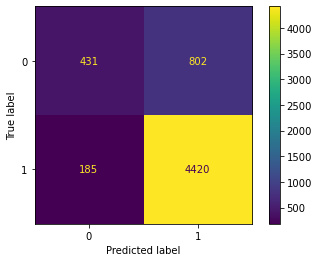

In [14]:
ConfusionMatrixDisplay.from_predictions(Y_valid_c1, Y_pred_lr_c1)

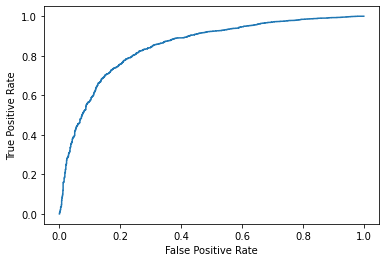

In [15]:
fpr, tpr, _ = roc_curve(Y_valid_c1, Y_pred_lr_c1_prob[:, 1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [16]:
print(f"AUC Score: {roc_auc_score(Y_valid_c1, Y_pred_lr_c1)}")

AUC Score: 0.6546901046413636


In [17]:
print(f"Macro F1 Score: {f1_score(Y_valid_c1, Y_pred_lr_c1, average='macro')}")

Macro F1 Score: 0.6828801874373662


In [18]:
print(f"Accuracy: {accuracy_score(Y_valid_c1, Y_pred_lr_c1)}")

Accuracy: 0.8309352517985612


### Perceptron

##### Model Generation

In [19]:
# create the model using 5-fold cross validation
gs_per_c1 = GridSearchCV(per_pipe, per_grid_params, cv=5)
gs_per_c1.fit(X_train, Y_train_c1.ravel())

# get predicted results using validation set
Y_pred_per_c1_prob = gs_per_c1.decision_function(X_test)
Y_pred_per_c1 = gs_per_c1.predict(X_test)

##### Scoring

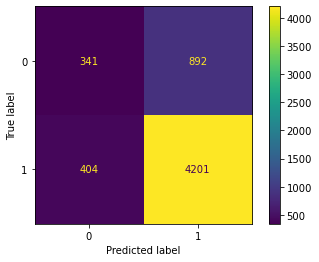

In [20]:
ConfusionMatrixDisplay.from_predictions(Y_valid_c1, Y_pred_per_c1)

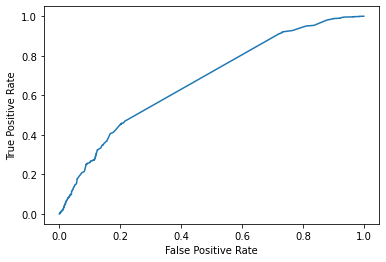

In [21]:
fpr, tpr, _ = roc_curve(Y_valid_c1, Y_pred_per_c1_prob)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [22]:
print(f"AUC Score: {roc_auc_score(Y_valid_c1, Y_pred_per_c1)}")

AUC Score: 0.5944152526477355


In [23]:
print(f"Macro F1 Score: {f1_score(Y_valid_c1, Y_pred_per_c1, average='macro')}")

Macro F1 Score: 0.6055784593614937


In [24]:
print(f"Accuracy: {accuracy_score(Y_valid_c1, Y_pred_per_c1)}")

Accuracy: 0.7780061664953751


### K-Nearest Neighbors

##### Model Generation

In [25]:
# create the model using 5-fold cross validation
gs_knn_c1 = GridSearchCV(knn, knn_grid_params, cv=5)
gs_knn_c1.fit(X_train, Y_train_c1.ravel())

# get predicted results using validation set
Y_pred_knn_c1_prob = gs_knn_c1.predict_proba(X_test)
Y_pred_knn_c1 = gs_knn_c1.predict(X_test)

##### Scoring

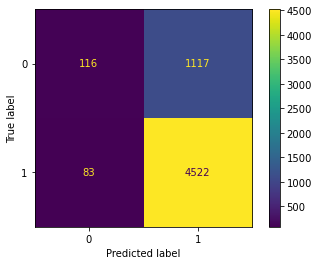

In [26]:
ConfusionMatrixDisplay.from_predictions(Y_valid_c1, Y_pred_knn_c1)

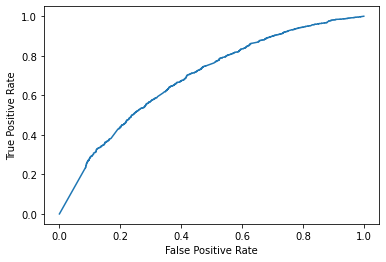

In [27]:
fpr, tpr, _ = roc_curve(Y_valid_c1, Y_pred_knn_c1_prob[:,1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [28]:
print(f"AUC Score: {roc_auc_score(Y_valid_c1, Y_pred_knn_c1)}")

AUC Score: 0.5380277969307665


In [29]:
print(f"Macro F1 Score: {f1_score(Y_valid_c1, Y_pred_knn_c1, average='macro')}")

Macro F1 Score: 0.5224347158385669


In [30]:
print(f"Accuracy: {accuracy_score(Y_valid_c1, Y_pred_knn_c1)}")

Accuracy: 0.7944501541623844


## Cutoff 2

### Logistic Regression

In [31]:
# set new 'overall' label to 0 if the original label is less than 3
Y_train_c2 = np.where(y_train[:] < 3, 0, 1)
Y_valid_c2 = np.where(y_test[:] < 3, 0, 1)

##### Model Generation

In [32]:
# create the model using 5-fold cross validation
gs_lr_c2 = GridSearchCV(lr_pipe, lr_grid_params, cv=5)
gs_lr_c2.fit(X_train, Y_train_c2.ravel())

# get predicted results using validation set
Y_pred_lr_c2_prob = gs_lr_c2.predict_proba(X_test)
Y_pred_lr_c2 = gs_lr_c2.predict(X_test)

##### Scoring

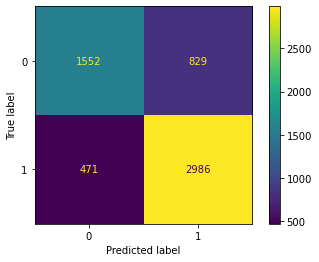

In [33]:
ConfusionMatrixDisplay.from_predictions(Y_valid_c2, Y_pred_lr_c2)

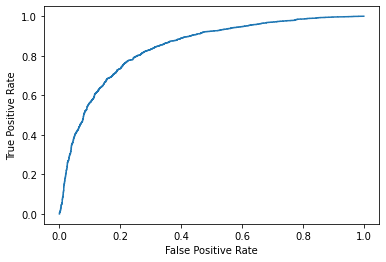

In [34]:
fpr, tpr, _ = roc_curve(Y_valid_c2, Y_pred_lr_c2_prob[:,1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [35]:
print(f"AUC Score: {roc_auc_score(Y_valid_c2, Y_pred_lr_c2)}")

AUC Score: 0.7577908320340969


In [36]:
print(f"Macro F1 Score: {f1_score(Y_valid_c2, Y_pred_lr_c2, average='macro')}")

Macro F1 Score: 0.7630229644217827


In [37]:
print(f"Accuracy: {accuracy_score(Y_valid_c2, Y_pred_lr_c2)}")

Accuracy: 0.7773210003425831


### Perceptron

##### Model Generation

In [38]:
# create the model using 5-fold cross validation
gs_per_c2 = GridSearchCV(per_pipe, per_grid_params, cv=5)
gs_per_c2.fit(X_train, Y_train_c2.ravel())

# get predicted results using validation set
Y_pred_per_c2_prob = gs_per_c2.decision_function(X_test)
Y_pred_per_c2 = gs_per_c2.predict(X_test)

##### Scoring

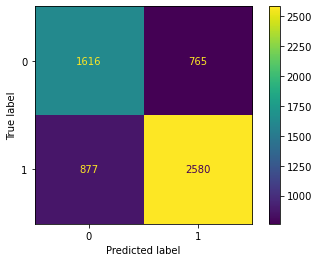

In [39]:
ConfusionMatrixDisplay.from_predictions(Y_valid_c2, Y_pred_per_c2)

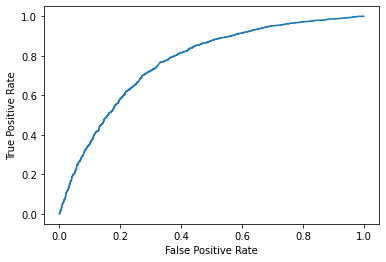

In [40]:
fpr, tpr, _ = roc_curve(Y_valid_c2, Y_pred_per_c2_prob)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [41]:
print(f"AUC Score: {roc_auc_score(Y_valid_c2, Y_pred_per_c2)}")

AUC Score: 0.7125091284694411


In [42]:
print(f"Macro F1 Score: {f1_score(Y_valid_c2, Y_pred_per_c2, average='macro')}")

Macro F1 Score: 0.710855396630188


In [43]:
print(f"Accuracy: {accuracy_score(Y_valid_c2, Y_pred_per_c2)}")

Accuracy: 0.7187392942788626


### K-Nearest Neighbors

##### Model Generation

In [44]:
# create the model using 5-fold cross validation
gs_knn_c2 = GridSearchCV(knn, knn_grid_params, cv=5)
gs_knn_c2.fit(X_train, Y_train_c2.ravel())

# get predicted results using validation set
Y_pred_knn_c2_prob = gs_knn_c2.predict_proba(X_test)
Y_pred_knn_c2 = gs_knn_c2.predict(X_test)

##### Scoring

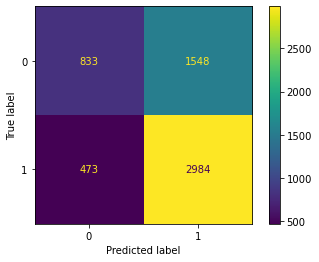

In [45]:
ConfusionMatrixDisplay.from_predictions(Y_valid_c2, Y_pred_knn_c2)

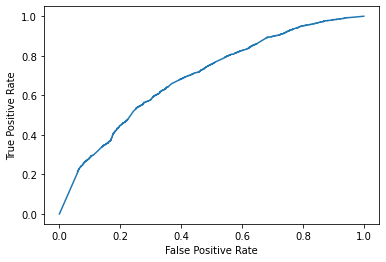

In [46]:
fpr, tpr, _ = roc_curve(Y_valid_c2, Y_pred_knn_c2_prob[:,1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [47]:
print(f"AUC Score: {roc_auc_score(Y_valid_c2, Y_pred_knn_c2)}")

AUC Score: 0.6065145836221256


In [48]:
print(f"Macro F1 Score: {f1_score(Y_valid_c2, Y_pred_knn_c2, average='macro')}")

Macro F1 Score: 0.5994425206913371


In [49]:
print(f"Accuracy: {accuracy_score(Y_valid_c2, Y_pred_knn_c2)}")

Accuracy: 0.6538198013018157


## Cutoff 3

### Logistic Regression

In [50]:
# set new 'overall' label to 0 if the original label is less than 4
Y_train_c3 = np.where(y_train[:] < 4, 0, 1)
Y_valid_c3 = np.where(y_test[:] < 4, 0, 1)

##### Model Generation

In [51]:
# create the model using 5-fold cross validation
gs_lr_c3 = GridSearchCV(lr_pipe, lr_grid_params, cv=5)
gs_lr_c3.fit(X_train, Y_train_c3.ravel())

# get predicted results using validation set
Y_pred_lr_c3_prob = gs_lr_c3.predict_proba(X_test)
Y_pred_lr_c3 = gs_lr_c3.predict(X_test)

##### Scoring

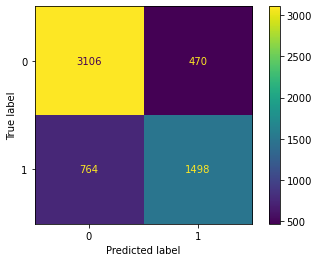

In [52]:
ConfusionMatrixDisplay.from_predictions(Y_valid_c3, Y_pred_lr_c3)

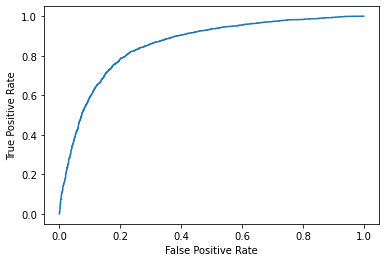

In [54]:
fpr, tpr, _ = roc_curve(Y_valid_c3, Y_pred_lr_c3_prob[:,1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [55]:
print(f"AUC Score: {roc_auc_score(Y_valid_c3, Y_pred_lr_c3)}")

AUC Score: 0.7654070164195136


In [56]:
print(f"Macro F1 Score: {f1_score(Y_valid_c3, Y_pred_lr_c3, average='macro')}")

Macro F1 Score: 0.7712738335400224


In [57]:
print(f"Accuracy: {accuracy_score(Y_valid_c3, Y_pred_lr_c3)}")

Accuracy: 0.7886262418636519


### Perceptron

##### Model Generation

In [58]:
# create the model using 5-fold cross validation
gs_per_c3 = GridSearchCV(per_pipe, per_grid_params, cv=5)
gs_per_c3.fit(X_train, Y_train_c3.ravel())

# get predicted results using validation set
Y_pred_per_c3_prob = gs_per_c3.decision_function(X_test)
Y_pred_per_c3 = gs_per_c3.predict(X_test)

##### Scoring

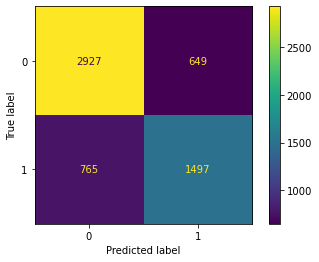

In [59]:
ConfusionMatrixDisplay.from_predictions(Y_valid_c3, Y_pred_per_c3)

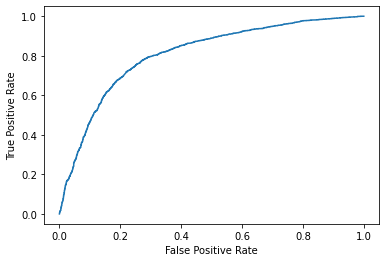

In [60]:
fpr, tpr, _ = roc_curve(Y_valid_c3, Y_pred_per_c3_prob)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [61]:
print(f"AUC Score: {roc_auc_score(Y_valid_c3, Y_pred_per_c3)}")

AUC Score: 0.7401580088892054


In [62]:
print(f"Macro F1 Score: {f1_score(Y_valid_c3, Y_pred_per_c3, average='macro')}")

Macro F1 Score: 0.7423340711389808


In [63]:
print(f"Accuracy: {accuracy_score(Y_valid_c3, Y_pred_per_c3)}")

Accuracy: 0.7577937649880095


### K-Nearest Neighbors

##### Model Generation

In [64]:
# create the model using 5-fold cross validation
gs_knn_c3 = GridSearchCV(knn, knn_grid_params, cv=5)
gs_knn_c3.fit(X_train, Y_train_c3.ravel())

# get predicted results using validation set
Y_pred_knn_c3_prob = gs_knn_c3.predict_proba(X_test)
Y_pred_knn_c3 = gs_knn_c3.predict(X_test)

##### Scoring

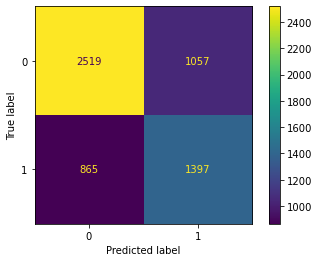

In [65]:
ConfusionMatrixDisplay.from_predictions(Y_valid_c3, Y_pred_knn_c3)

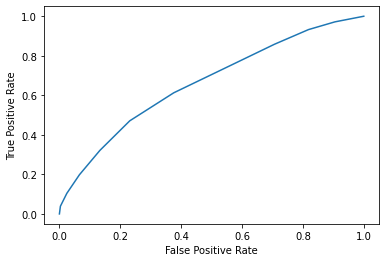

In [66]:
fpr, tpr, _ = roc_curve(Y_valid_c1, Y_pred_knn_c3_prob[:,1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [67]:
print(f"AUC Score: {roc_auc_score(Y_valid_c3, Y_pred_knn_c3)}")

AUC Score: 0.6610066965742735


In [68]:
print(f"Macro F1 Score: {f1_score(Y_valid_c3, Y_pred_knn_c3, average='macro')}")

Macro F1 Score: 0.6581509022842268


In [69]:
print(f"Accuracy: {accuracy_score(Y_valid_c3, Y_pred_knn_c3)}")

Accuracy: 0.670777663583419


## Cutoff 4

### Logistic Regression

In [119]:
# set new 'overall' label to 0 if the original label is less than 5
Y_train_c4 = np.where(y_train[:] < 5, 0, 1)
Y_valid_c4 = np.where(y_test[:] < 5, 0, 1)

##### Model Generation

In [71]:
# create the model using 5-fold cross validation
gs_lr_c4 = GridSearchCV(lr_pipe, lr_grid_params, cv=5)
gs_lr_c4.fit(X_train, Y_train_c4.ravel())

# get predicted results using validation set
Y_pred_lr_c4_prob = gs_lr_c4.predict_proba(X_test)
Y_pred_lr_c4 = gs_lr_c4.predict(X_test)

##### Scoring

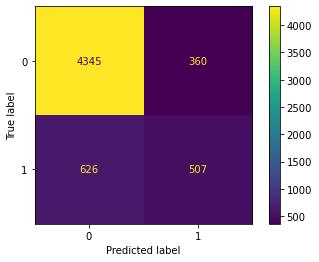

In [73]:
ConfusionMatrixDisplay.from_predictions(Y_valid_c4, Y_pred_lr_c4)

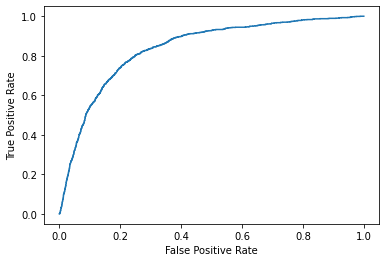

In [76]:
fpr, tpr, _ = roc_curve(Y_valid_c4, Y_pred_lr_c4_prob[:,1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [75]:
print(f"AUC Score: {roc_auc_score(Y_valid_c4, Y_pred_lr_c4)}")

AUC Score: 0.6854851039203567


In [77]:
print(f"Macro F1 Score: {f1_score(Y_valid_c4, Y_pred_lr_c4, average='macro')}")

Macro F1 Score: 0.7025491938817694


In [78]:
print(f"Accuracy: {accuracy_score(Y_valid_c4, Y_pred_lr_c4)}")

Accuracy: 0.8311065433367592


### Perceptron

##### Model Generation

In [79]:
# create the model using 5-fold cross validation
gs_per_c4 = GridSearchCV(per_pipe, per_grid_params, cv=5)
gs_per_c4.fit(X_train, Y_train_c4.ravel())

# get predicted results using validation set
Y_pred_per_c4_prob = gs_per_c4.decision_function(X_test)
Y_pred_per_c4 = gs_per_c4.predict(X_test)

##### Scoring

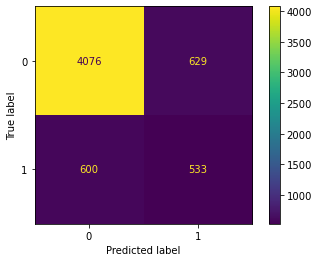

In [80]:
ConfusionMatrixDisplay.from_predictions(Y_valid_c4, Y_pred_per_c4)

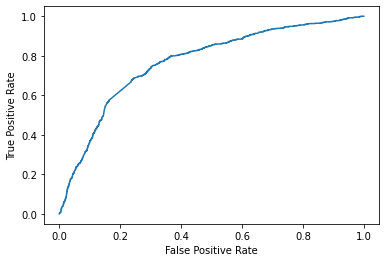

In [81]:
fpr, tpr, _ = roc_curve(Y_valid_c4, Y_pred_per_c4_prob)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [82]:
print(f"AUC Score: {roc_auc_score(Y_valid_c4, Y_pred_per_c4)}")

AUC Score: 0.6683724568612573


In [83]:
print(f"Macro F1 Score: {f1_score(Y_valid_c4, Y_pred_per_c4, average='macro')}")

Macro F1 Score: 0.6667392650838541


In [84]:
print(f"Accuracy: {accuracy_score(Y_valid_c4, Y_pred_per_c4)}")

Accuracy: 0.789482699554642


### K-Nearest Neighbors

##### Model Generation

In [85]:
# create the model using 5-fold cross validation
gs_knn_c4 = GridSearchCV(knn, knn_grid_params, cv=5)
gs_knn_c4.fit(X_train, Y_train_c4.ravel())

# get predicted results using validation set
Y_pred_knn_c4_prob = gs_knn_c4.predict_proba(X_test)
Y_pred_knn_c4 = gs_knn_c4.predict(X_test)

##### Scoring

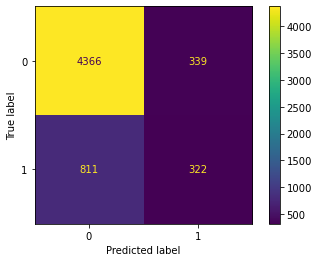

In [86]:
ConfusionMatrixDisplay.from_predictions(Y_valid_c4, Y_pred_knn_c4)

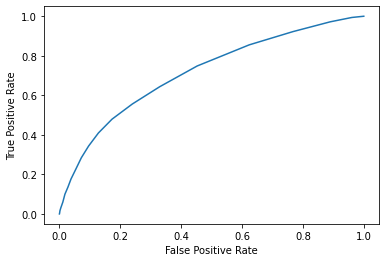

In [87]:
fpr, tpr, _ = roc_curve(Y_valid_c4, Y_pred_knn_c4_prob[:,1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [88]:
print(f"AUC Score: {roc_auc_score(Y_valid_c4, Y_pred_knn_c4)}")

AUC Score: 0.6060751130466265


In [89]:
print(f"Macro F1 Score: {f1_score(Y_valid_c4, Y_pred_knn_c4, average='macro')}")

Macro F1 Score: 0.6213005775847305


In [90]:
print(f"Accuracy: {accuracy_score(Y_valid_c4, Y_pred_knn_c4)}")

Accuracy: 0.803014731072285


### Predicting Ratings for Test Data

The Logistic Regression Model seemed to have the highest F1 scores, so this will be the model used to predict ratings of the Test Data.

In [91]:
from pathlib import Path

ids = [i for i in range(4500)]

##### Cutoff 1

In [92]:
Y_c1 = np.array(gs_lr_c1.predict(X_vect_test))

# create the dataframe
df_c1 = pd.DataFrame({'predicted': Y_c1})

# write the dataframe to a .csv file
fp_c1 = Path('KAGGLE/c1.csv')  
fp_c1.parent.mkdir(parents=True, exist_ok=True)  
df_c1.to_csv(fp_c1)  

df_c1

,predicted
0,0
1,0
2,0
3,1
4,1
...,...
4495,1
4496,1
4497,1
4498,1


##### Cutoff 2

In [93]:
Y_c2 = np.array(gs_lr_c2.predict(X_vect_test))

# create the dataframe
df_c2 = pd.DataFrame({'predicted': Y_c2})

# write the dataframe to a .csv file
fp_c2 = Path('KAGGLE/c2.csv')  
fp_c2.parent.mkdir(parents=True, exist_ok=True)  
df_c2.to_csv(fp_c2)  

df_c2

,predicted
0,0
1,0
2,0
3,1
4,0
...,...
4495,1
4496,1
4497,1
4498,1


##### Cutoff 3

In [94]:
Y_c3 = np.array(gs_lr_c3.predict(X_vect_test))

# create the dataframe
df_c3 = pd.DataFrame({'predicted': Y_c3})

# write the dataframe to a .csv file
fp_c3 = Path('KAGGLE/c3.csv')  
fp_c3.parent.mkdir(parents=True, exist_ok=True)  
df_c3.to_csv(fp_c3)  

df_c3

,predicted
0,0
1,0
2,0
3,0
4,0
...,...
4495,0
4496,0
4497,1
4498,1


##### Cutoff 4

In [95]:
Y_c4 = np.array(gs_lr_c4.predict(X_vect_test))

# create the dataframe
df_c4 = pd.DataFrame({'predicted': Y_c4})

# write the dataframe to a .csv file
fp_c4 = Path('KAGGLE/c4.csv')  
fp_c4.parent.mkdir(parents=True, exist_ok=True)  
df_c4.to_csv(fp_c4)  

df_c4

,predicted
0,0
1,0
2,0
3,0
4,0
...,...
4495,0
4496,0
4497,0
4498,0


# Multiclass Classification

We will use <b>Logistic Regression</b>, <b>DecisionTreeClassifier</b>, and <b>MultinomialNB</b> as our models for multiclass classification.

Each model will use $\text{GridSearchCV}$ to tune hyperparameters through 5-fold cross validation.

### Logistic Regression

##### Pipeline and Hyperparameters

In [96]:
lrm_pipe = Pipeline([('clf', LogisticRegression(max_iter=its, multi_class='multinomial'))])

lrm_grid_params = {
    'clf__C': [.01, .1, 1, 5],
    'clf__solver': ['newton-cg']
}

##### Model Generation

In [97]:
# create the model using 5-fold cross validation
gs_lrm = GridSearchCV(lrm_pipe, lrm_grid_params, cv=5)
gs_lrm.fit(X_train, y_train.ravel())

# get predicted results using validation set
Y_pred_lrm_prob = gs_lrm.predict_proba(X_test)
Y_pred_lrm = gs_lrm.predict(X_test)

##### Scoring

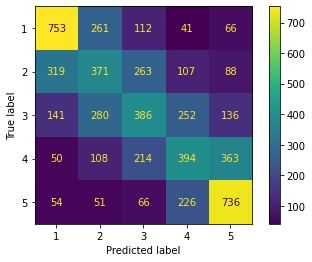

In [98]:
ConfusionMatrixDisplay.from_predictions(y_test, Y_pred_lrm)

<a href="https://scikit-learn.org/0.15/auto_examples/plot_roc.html" target="_blank">Guidance</a> for plotting ROC curve for multiclass classification

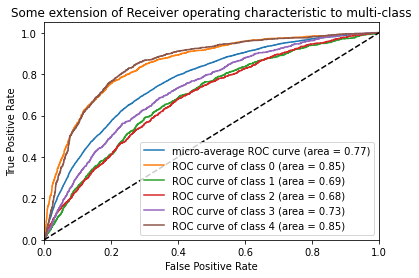

In [99]:
y = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
n_classes = y.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], Y_pred_lrm_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), Y_pred_lrm_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [100]:
print(f"AUC Score: {roc_auc_score(y_test, Y_pred_lrm_prob, multi_class='ovr')}")

AUC Score: 0.7587975773179223


In [101]:
print(f"Macro F1 Score: {f1_score(y_test, Y_pred_lrm, average='macro')}")

Macro F1 Score: 0.44411568435757776


In [102]:
print(f"Accuracy: {accuracy_score(y_test, Y_pred_lrm)}")

Accuracy: 0.4522096608427544


### Decision Tree

##### Pipeline and Hyperparameters

In [103]:
tree = DecisionTreeClassifier()

tree_grid_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30]
}

##### Model Generation

In [104]:
# create the model using 5-fold cross validation
gs_tree = GridSearchCV(tree, tree_grid_params, cv=5)
gs_tree.fit(X_train, y_train.ravel())

# get predicted results using validation set
Y_pred_tree_prob = gs_tree.predict_proba(X_test)
Y_pred_tree = gs_tree.predict(X_test)

##### Scoring

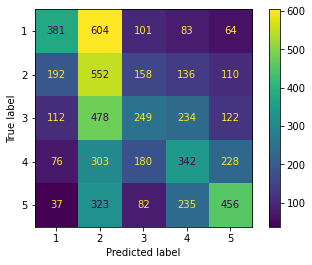

In [105]:
ConfusionMatrixDisplay.from_predictions(y_test, Y_pred_tree)

<a href="https://scikit-learn.org/0.15/auto_examples/plot_roc.html" target="_blank">Guidance</a> for plotting ROC curve for multiclass classification

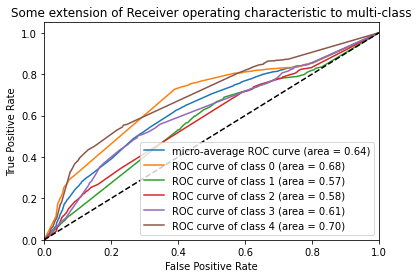

In [106]:
y = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
n_classes = y.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], Y_pred_tree_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), Y_pred_tree_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [107]:
print(f"AUC Score: {roc_auc_score(y_test, Y_pred_tree_prob, multi_class='ovr')}")

AUC Score: 0.6298614199634189


In [108]:
print(f"Macro F1 Score: {f1_score(y_test, Y_pred_tree, average='macro')}")

Macro F1 Score: 0.34019811466167454


In [109]:
print(f"Accuracy: {accuracy_score(y_test, Y_pred_tree)}")

Accuracy: 0.3391572456320658


### MultinomialNB

##### Pipeline and Hyperparameters

In [110]:
mnb = MultinomialNB()

mnb_grid_params = {
    'alpha': [.1, .5, .75, 1]
}

##### Model Generation

In [111]:
# create the model using 5-fold cross validation
gs_mnb = GridSearchCV(mnb, mnb_grid_params, cv=5)
gs_mnb.fit(X_train, y_train.ravel())

# get predicted results using validation set
Y_pred_mnb_prob = gs_mnb.predict_proba(X_test)
Y_pred_mnb = gs_mnb.predict(X_test)

##### Scoring

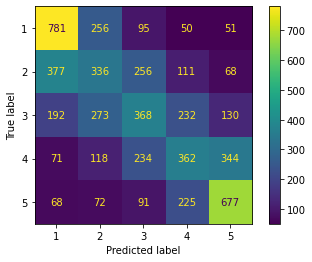

In [112]:
ConfusionMatrixDisplay.from_predictions(y_test, Y_pred_mnb)

<a href="https://scikit-learn.org/0.15/auto_examples/plot_roc.html" target="_blank">Guidance</a> for plotting ROC curve for multiclass classification

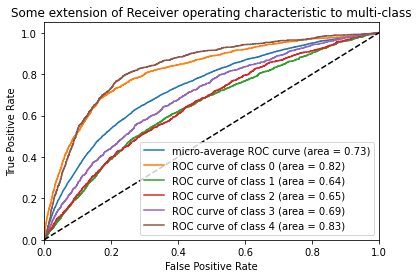

In [113]:
y = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
n_classes = y.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], Y_pred_mnb_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), Y_pred_mnb_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [114]:
print(f"AUC Score: {roc_auc_score(y_test, Y_pred_mnb_prob, multi_class='ovr')}")

AUC Score: 0.7266028500312542


In [115]:
print(f"Macro F1 Score: {f1_score(y_test, Y_pred_mnb, average='macro')}")

Macro F1 Score: 0.42287050440104695


In [116]:
print(f"Accuracy: {accuracy_score(y_test, Y_pred_mnb)}")

Accuracy: 0.43233984241178486


### Predicting Ratings for Test Data

The Logistic Regression Model seemed to have the highest F1 scores, so this will be the model used to predict ratings of the Test Data.

In [117]:
Y_pred_lrm = np.array(gs_lrm.predict(X_vect_test))

# create the dataframe
df_lrm = pd.DataFrame({'predicted': Y_pred_lrm})

# write the dataframe to a .csv file
fp = Path('KAGGLE/multi.csv')  
fp.parent.mkdir(parents=True, exist_ok=True)  
df_lrm.to_csv(fp)  

df_lrm

,predicted
0,1
1,1
2,1
3,1
4,2
...,...
4495,5
4496,3
4497,5
4498,5


# Clustering

Cluster the Test data into 6 groups representing the 6 product types defined in the <i><b>category</b></i> column.

We use $\text{GridSearchCV}$ to tune hyperparameters.

In [175]:
labels_true = df_test['category']
categories = np.unique(df_test['category'])

In [178]:
kmeans = KMeans(init="k-means++", n_clusters=len(categories), max_iter=its, n_init=100, random_state=42)

kmeans_grid_params = {
    'tol': [1e-6, 1e-4, 1e-2],
}

##### Generate Model

In [179]:
gs_kmeans = GridSearchCV(kmeans, kmeans_grid_params, cv=5)

# fit the data
gs_kmeans.fit(X_vect_test)

# predict labels
labels_pred = gs_kmeans.predict(X_vect_test)

##### Scoring

In [180]:
print(f"Silhouette Score: {silhouette_score(X_vect_test, labels_pred)}")

Silhouette Score: 0.5110215134335946


In [181]:
print(f"Rand Index Score: {rand_score(labels_true, labels_pred)}")

Rand Index Score: 0.24492909535452323
